<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [3]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 172.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 180.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 148.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 139.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 112.4 MB/s eta 0:00:00


Import pandas module


In [4]:
import pandas as pd

Import matplotlib


In [5]:
import matplotlib.pyplot as plt

## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [6]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [7]:
#identify the name of 114 columns to estimate the uniqueness of columns
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [8]:
#observer le contenu des 5 premieres lignes des 114 colonnes par bloc de 10 colonnes
# Nombre de colonnes à afficher par groupe
col_per_group = 10

# Découper les colonnes par blocs
for i in range(0, len(df.columns), col_per_group):
    # Sélectionner un groupe de colonnes
    cols = df.iloc[:, i:i + col_per_group]
    
    # Afficher les premières lignes de ce bloc
    print(f"Colonnes {i + 1} à {min(i + col_per_group, len(df.columns))} :")
    print(cols.head())
    print("\n")  # Espacement entre les blocs

Colonnes 1 à 10 :
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4               

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [9]:
# Count the number of duplicate rows in the dataset -step 1
total_doublons = df.duplicated().sum()
print("Number of duplicate rows in the dataset:", total_doublons)

Number of duplicate rows in the dataset: 20


In [10]:
# Identify the duplicate rows’ structure - step 2
df_doublons = df[df.duplicated()]
print("Distribution of duplicate rows :")
print(df_doublons.groupby(list(df.columns)).size())

Distribution of duplicate rows :
Series([], dtype: int64)


In [11]:
print(df[df.duplicated()].head())

       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to open-source projects;Other...   
65440                     

In [13]:
#identify the columns with duplicates - step 4
colonnes_avec_doublons = [col for col in df.columns if df[col].duplicated().any()]
print("The following columns have duplicate rows :", colonnes_avec_doublons)

The following columns have duplicate rows : ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWo

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [18]:
# Display the duplicate rows for specific columns -step 5
# Identifier les doublons sur des colonnes spécifiques
lignes_doublons_colonnes = df[df.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork'], keep=False)]

# Afficher les lignes en doublons
print("Duplicate rows on specific columns :")
print(lignes_doublons_colonnes)

Duplicate rows on specific columns :
       ResponseId                                         MainBranch  \
0               1                     I am a developer by profession   
1               2                     I am a developer by profession   
2               3                     I am a developer by profession   
3               4                              I am learning to code   
4               5                     I am a developer by profession   
...           ...                                                ...   
65452       35588  I am not primarily a developer, but I write co...   
65453       50580                     I am a developer by profession   
65454        9938                     I am a developer by profession   
65455       40874                     I am a developer by profession   
65456       36796                     I am a developer by profession   

                      Age                                         Employment  \
0      Under 18 ye

In [ ]:
#all of columns can have duplicates since it is a survey and responses have to be selected from a given selection,
#ResponseId is a unique identifier and duplicates should be removed based on this column
#maybe test subset with ResponseId and other

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


In [19]:
#visualise duplicates structure using bar and pie chart – step 3

# Compter les occurrences (True = doublons, False = unique)
distribution_doublons = df.duplicated().value_counts()
print(distribution_doublons)

False    65437
True        20
Name: count, dtype: int64


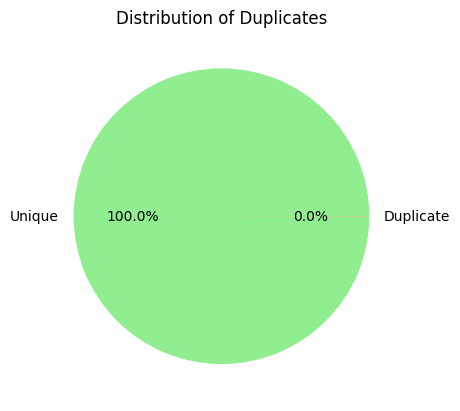

In [20]:
import matplotlib.pyplot as plt

# Pie chart
distribution_doublons.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'coral'], labels=["Unique", "Duplicate"])
plt.title("Distribution of Duplicates")
plt.ylabel("")  
plt.show()

⚠️Pie chart is not convenient to display such proportion of duplicate (0.03%)

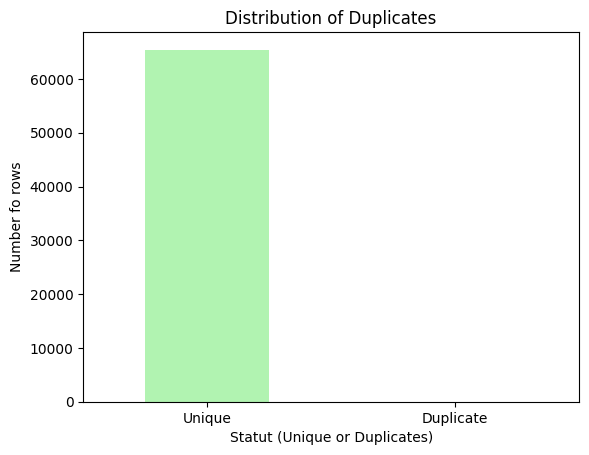

In [21]:
# Bar chart
distribution_doublons.plot(kind='bar', color=['lightgreen', 'coral'], alpha=0.7)
plt.title("Distribution of Duplicates")
plt.xlabel("Statut (Unique or Duplicates)")
plt.ylabel("Number fo rows")
plt.xticks(ticks=[0, 1], labels=["Unique", "Duplicate"], rotation=0)
plt.show()

⚠️bart chart is more appropriate than pie chart, however, scale have to be changed to visualize duplicate

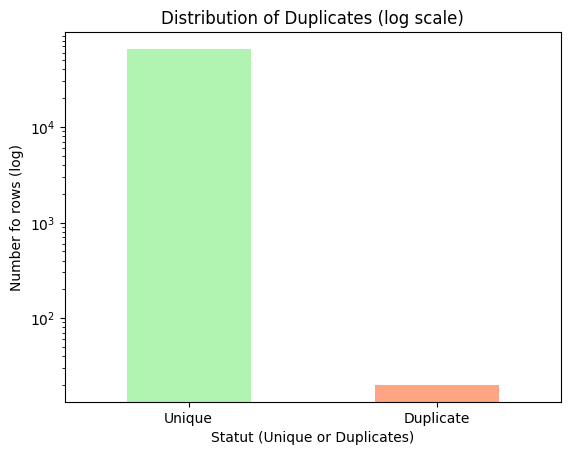

In [31]:
# Bar chart using log scale
distribution_doublons.plot(kind='bar', color=['lightgreen', 'coral'], alpha=0.7)
plt.title("Distribution of Duplicates (log scale)")
plt.xlabel("Statut (Unique or Duplicates)")
plt.yscale('log')
plt.ylabel("Number fo rows (log)")
plt.xticks(ticks=[0, 1], labels=["Unique", "Duplicate"], rotation=0)
plt.show()

⚠️After check, neither pie chart or bar chart is appropriate to visualize duplicates for both Country and Employment due to large dataset

>➡️Use Heatmap from seaborn instead

In [28]:
!pip install seaborn

/tmp/ipykernel_301/2915418299.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


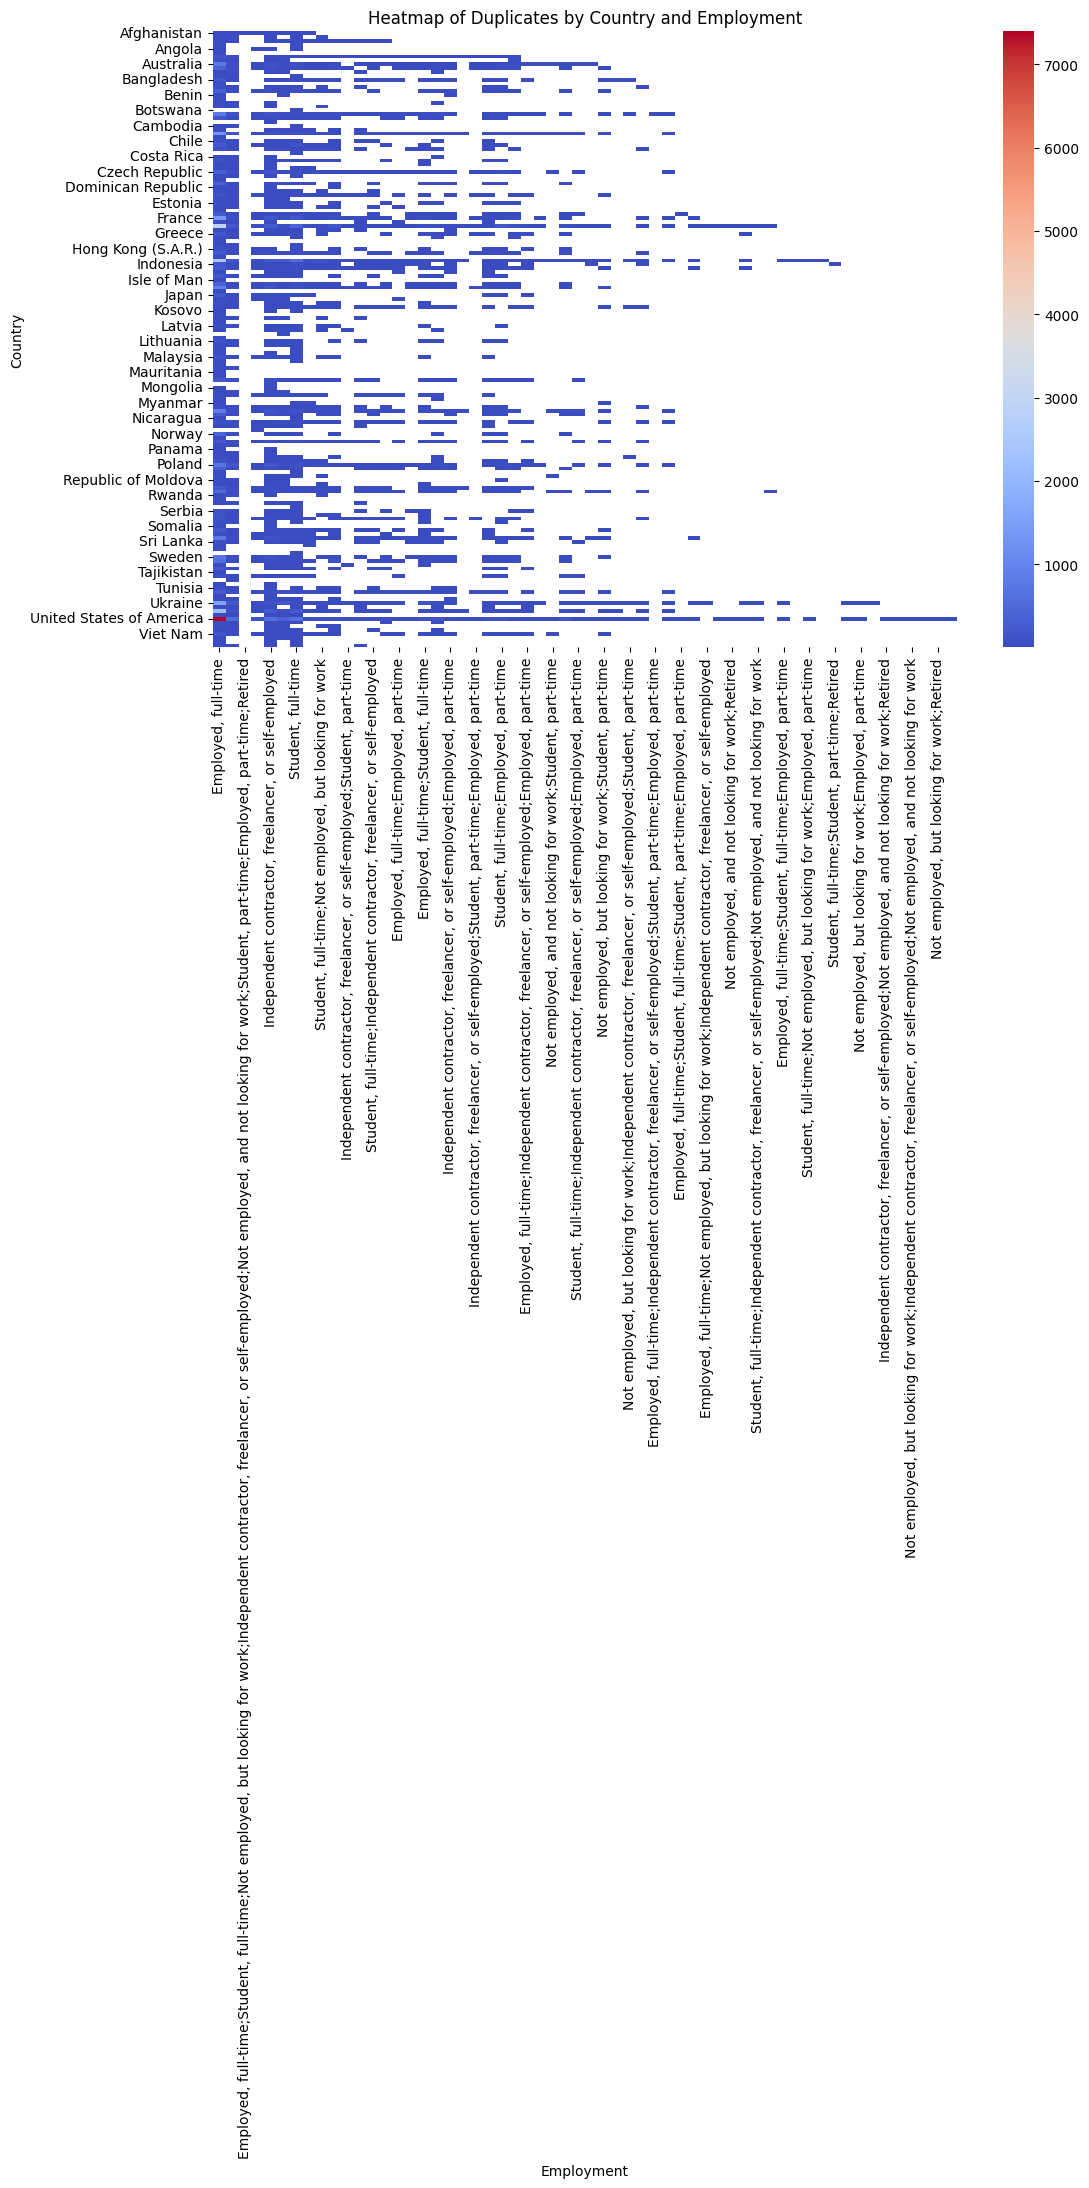

In [29]:
import seaborn as sns

# Compter les doublons par combinaison de 'Country' et 'Employment'
heatmap_data = duplicates.groupby(['Country', 'Employment']).size().unstack()

# Créer la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, cmap='coolwarm', cbar=True)
plt.title("Heatmap of Duplicates by Country and Employment")
plt.xlabel("Employment")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


<h5>💡decide which columns are critical for defining uniqueness in the dataset</h5>

Since data are collected from a survey where responses are pre-establihsed and categorized, the duplicates are normal.

The only column that is unique is 'ResponseId'. So, the duplicates will be removed in the df based on a subset of columns with 'ResponseId'

In [30]:
## Create a new df cleaned with no duplicates – step 6
#since the 'ResponseId' is listed in colonnes_avec_doublons, 
#all this subset can be used to remove securely the 20 duplicates rows
df_sans_doublons = df.drop_duplicates(subset=colonnes_avec_doublons, keep='first')

print("DataFrame ‘df_sans_doublons’ is cleaned from duplicates")
# Vérify the removing of 20 duplicate rows
print("Shape of original DataFrame :", df.shape)
print("Shape after dropping duplicates :", df_sans_doublons.shape)

DataFrame ‘df_sans_doublons’ is cleaned from duplicates
Shape of original DataFrame : (65457, 114)
Shape after dropping duplicates : (65437, 114)


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
